###**Relatório Experimental da Comparação entre Diferentes Configurações de SVM na Base de Dados Glass**

Disciplina: Aprendizagem de Máquina - IN1102

Docente: Prof. Dr. Leandro Maciel Almeida

Discentes: 
Lucas Benevides V. de Amorim, Cynthia Moreira Maia e Sara Bandeira

Coutinho.


##**Introdução**

 Os modelos SVM, ou Support Vector Machine, visam encontrar um hiperplano ótimo para problemas de classificação (SVC) e regressão (SVR)  a respeito dos dados [1]. Esse tipo de modelo é aplicável a problemas que são linearmente separáveis, sendo isto um fator de impacto para obtenção de um modelo bem ajustado. Para sua aplicação em problemas que sejam não-linearmente separáveis, tem-se a adoção de funções kernels, cuja finalidade é a projeção de vetores de características de entrada para espaços de dimensões maiores, para que se tornem linearmente separáveis [2]. Dentre os diferentes tipos de kernel, quatro deles são mais conhecidos, que são: Linear, Polinomial, RBF gaussiano e Sigmoid.
 
  O kernel linear é usado quando as classes são separáveis linearmente. A proposta é dada pela construção de linhas que de fato separam as classes, por isso a importância de se ter um cenário desse tipo para que o kernel performatize bem. É um dos mais comuns e de aplicação simples, recomendável principalmente ao se ter um grande número de recursos em um dado conjunto [3]. O kernel polinomial pode ser usado de forma linear quando o d=1, ou seja, representa o grau do polinômio, em que o modelo é influenciado pelos graus dos polinômios, por exemplo, se o modelo estiver se sobreajustando é necessário reduzir o grau polinomial, ao contrário, se estiver subajustando é preciso tentar aumentá-lo [4] [5]. No kernel Radial Basis Function (Função de Base Radial, ou RBF) gaussiano, é possível resolver problemas que na sua forma original não são linearmente separáveis, diante que realizam o mapeamento do espaço original para um espaço de maior dimensão [4]. E o kernel sigmoidal, também transforma os dados não linearmente separáveis em dados linearmente separáveis. Cada kernel tem seus parâmetros específicos e um ponto importante é que a escolha do kernel e de seus parâmetros afeta o desempenho do classificador  obtido, diante que definem a fronteira de decisão [6].
 
  Dessa forma, este relatório tem por objetivo apresentar uma comparação entre os 4 kernels descritos anteriormente,  na base de dados, Glass, oriunda do repositório da UCI. O problema analisado é de classificação, no qual, contém: 6 classes, 10 atributos (no total) e 214 instâncias. O objetivo consiste em classificar os tipos de vidros para investigação criminológica, a partir de informações como: índice de refração, alumínio, silício e magnésio. 



## **Experimentos**

Os algoritmos foram implementados na ferramenta Colab, com uso da linguagem Python. O pacote principal utilizado foi o sklearn.  

### Carregamento de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate 
from sklearn.svm import SVC
from collections import Counter
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy.stats import norm 
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


###Carregamento dos dados

In [3]:
# Carregamento dos dados:
cols = ['id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'class']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None, names=cols)
df = df.drop(['id'], axis = 1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Pré-processamento

As técnicas de pré-processamento visam modificar os dados de entrada para um formato que seja possível realizar análises com um melhor desempenho, que melhorem a qualidade dos dados [6]. Algumas das tarefas envolvidas, nessa etapa de pré-processamento, foram verificadas para o problema em questão. 

### Análise Exploratória dos Dados

Inicialmente, realizou-se uma análise exploratória dos dados

In [ ]:
# Verificar tipos de dados, quantidades e valores null:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Verificar valores faltosos:
pd.options.mode.use_inf_as_na = True
df.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
class    0
dtype: int64

Conforme resultados, todos os atributos são contínuos e não há valores faltosos. Corroborando com a descrição dos dados presente no repositório.

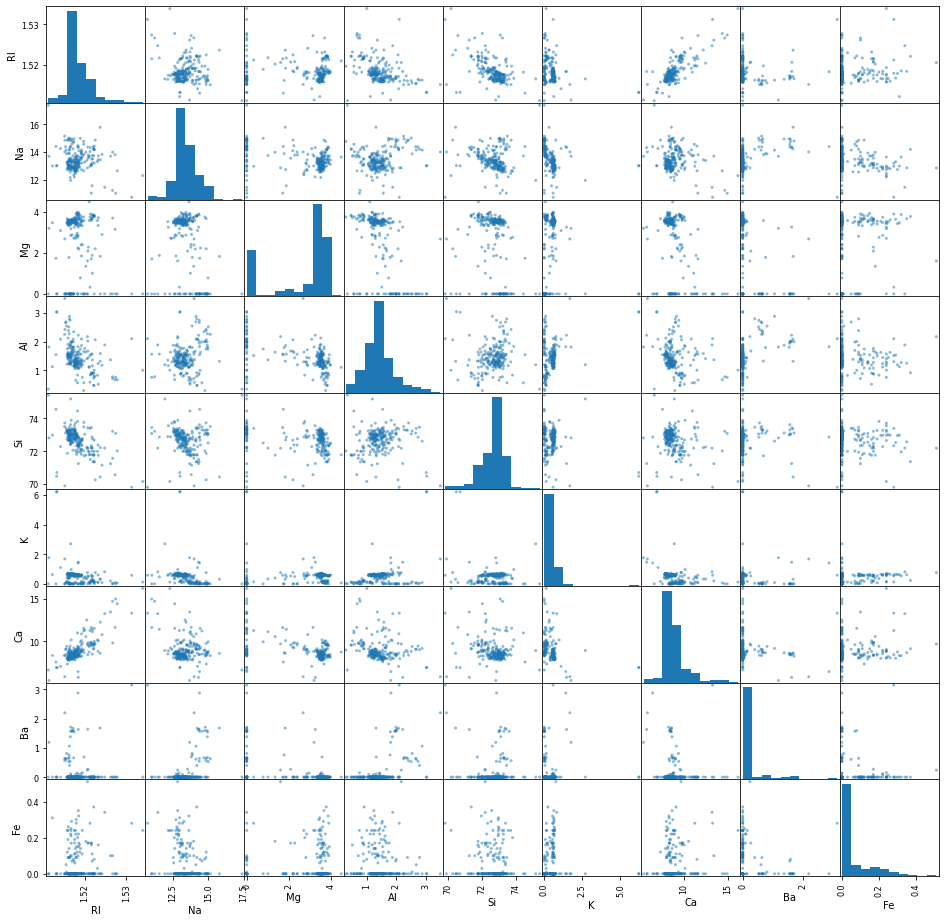

In [ ]:
# Verificar correlação dos dados, plotar matriz de dispersão:
attributes = list(df.columns[:-1])
scatter_matrix(df[attributes], figsize=(16,16));

De acordo com a descrição do dataset no repositório os atributos têm as seguintes correlações com as classes:

| Attribute | Min    | Max    | Mean    | SD     | Correlation with class |
|-----------|--------|--------|---------|--------|------------------------|
| RI        | 1.5112 | 1.5339 | 1.5184  | 0.0030 | -0.1642                |
| Na        | 10.73  | 17.38  | 13.4079 | 0.8166 | 0.5030                 |
| Mg        | 0      | 4.49   | 2.6845  | 1.4424 | -0.7447                |
| Al        | 0.29   | 3.5    | 1.4449  | 0.4993 | 0.5988                 |
| Si        | 69.81  | 75.41  | 72.6509 | 0.7745 | 0.1515                 |
| K         | 0      | 6.21   | 0.4971  | 0.6522 | -0.0100                |
| Ca        | 5.43   | 16.19  | 8.9570  | 1.4232 | 0.0007                 |
| Ba        | 0      | 3.15   | 0.1750  | 0.4972 | 0.5751                 |
| Fe        | 0      | 0.51   | 0.0570  | 0.0974 | -0.1879                |

@TODO: comentar a matriz e a tabela.

In [ ]:
# Calculando algumas estatísticas para cada atributo:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


É possível obsevar que os atributos estão em escalas bem diferentes, sendo necessária uma normalização.

In [ ]:
# Contagem de instâncias por classe:
Counter(df['class'])

Counter({1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29})

O número de instâncias por classe varia bastante [9, 76]. Será necessário realizar um balanceamento das classes.

## Pré-processamento

In [4]:
# Separando X e y:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[[-1]]].to_numpy().ravel()

In [5]:
# Vamos realizar o balanceamento das classes por meio de sobreamostragem das classes
# até que fiquem todas com 76 instâncias cada. Já que 76 é o núm. de instâncias da classe
# majoritária:
X, y = SMOTE().fit_resample(X, y)
Counter(y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})

In [6]:
# Separando os 5 folds para validação cruzada repetida 10 vezes:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
X_train_folds = []
y_train_folds = []
X_test_folds = []
y_test_folds = []
for train_index, test_index in rkf.split(X):
  X_train_folds.append(X[train_index])
  X_test_folds.append(X[test_index])
  y_train_folds.append(y[train_index])
  y_test_folds.append(y[test_index])

X_train, val_x, y_train, val_y = train_test_split(X_train_folds, y_train_folds, test_size=0.20)

#len(X_train_folds) #5 folds x 10 repetições = 50

In [ ]:
val_x[0]

array([[ 1.51761   , 13.89      ,  3.6       , ...,  7.83      ,
         0.        ,  0.        ],
       [ 1.51766   , 13.21      ,  3.69      , ...,  8.22      ,
         0.        ,  0.        ],
       [ 1.51742   , 13.27      ,  3.62      , ...,  8.07      ,
         0.        ,  0.        ],
       ...,
       [ 1.51577748, 14.21928512,  0.        , ...,  9.2009928 ,
         0.58586975,  0.0327641 ],
       [ 1.51586977, 14.27048037,  0.        , ...,  9.0556623 ,
         0.49397382,  0.05475982],
       [ 1.51613203, 14.97847981,  0.        , ...,  8.76695963,
         0.6035471 ,  0.        ]])

In [7]:
# Padronizando a escala dos dados entre 0 e 1 (normalização):
# Vamos ajustar a transformação ao conjunto de treinamento e aplicar a mesma 
# transformação ao conjunto de teste para evitar o "look ahead bias".
scaler = MinMaxScaler()
for i in range(len(X_train_folds)):
  X_train_folds[i] = scaler.fit_transform(X_train_folds[i])
  X_test_folds[i] = scaler.transform(X_test_folds[i])

## Funções auxiliares

In [8]:
def calculate_metrics(cv_results):
  '''Recebe um dicionário no contendo como chaves 'test_accuracy', 'test_precision',
  'test_recall', 'test_f1', 'train_accuracy', 'train_precision',
  'train_recall', 'train_f1' e como valores os vetores com os resultados de cada fold
  para cada uma das referidas métricas, retorna em um dicionário uma estimativa 
  pontual e um intervalo de confiança para 'test_error_rate', 'test_precision' ... 'train_f1'. '''


  z_critical = norm.ppf(0.95) #valor crítico Z para intervalo de confiança de 95%
  pop_size = X.shape[0]

  # Dicionário para armazenar as métricas: 
  results = {'test_error_rate':None, 'test_precision':None, 'test_recall':None, 'test_f1':None,
             'train_error_rate':None, 'train_precision':None, 'train_recall':None, 'train_f1':None}

  #Calulando para conjunto de teste:

  test_error_rate = np.ones(len(cv_results['test_accuracy']))-cv_results['test_accuracy']  # error_rate = 1 - accuracy
  test_error_mean = np.mean(test_error_rate)
  test_error_std = np.std(test_error_rate)
  test_precision_mean = np.mean(cv_results['test_precision'])
  test_precision_std = np.std(cv_results['test_precision'])
  test_recall_mean = np.mean(cv_results['test_recall'])
  test_recall_std = np.std(cv_results['test_recall'])
  test_f1_mean = np.mean(cv_results['test_f1'])
  test_f1_std = np.std(cv_results['test_f1'])

  test_error_margin = z_critical * (test_error_std/sqrt(pop_size))
  test_error_conf_interv = (test_error_mean - test_error_margin, test_error_mean + test_error_margin)
  results['test_error_rate'] = {'mean':test_error_mean, 'conf_interv':test_error_conf_interv}

  test_precision_margin = z_critical * (test_precision_std/sqrt(pop_size))
  test_precision_conf_interv = (test_precision_mean - test_precision_margin, test_precision_mean + test_precision_margin)
  results['test_precision'] = {'mean':test_precision_mean, 'conf_interv':test_precision_conf_interv}
  
  test_recall_margin = z_critical * (test_recall_std/sqrt(pop_size))
  test_recall_conf_interv = (test_recall_mean - test_recall_margin, test_recall_mean + test_recall_margin)
  results['test_recall'] = {'mean':test_recall_mean, 'conf_interv':test_recall_conf_interv}

  test_f1_margin = z_critical * (test_f1_std/sqrt(pop_size))
  test_f1_conf_interv = (test_f1_mean - test_f1_margin, test_f1_mean + test_f1_margin)
  results['test_f1'] = {'mean':test_f1_mean, 'conf_interv':test_f1_conf_interv}

  #Calulando para conjunto de treino:
  train_error_rate = np.ones(len(cv_results['train_accuracy']))-cv_results['train_accuracy']  # error_rate = 1 - accuracy
  train_error_mean = np.mean(train_error_rate)
  train_error_std = np.std(train_error_rate)
  train_precision_mean = np.mean(cv_results['train_precision'])
  train_precision_std = np.std(cv_results['train_precision'])
  train_recall_mean = np.mean(cv_results['train_recall'])
  train_recall_std = np.std(cv_results['train_recall'])
  train_f1_mean = np.mean(cv_results['train_f1'])
  train_f1_std = np.std(cv_results['train_f1'])

  train_error_margin = z_critical * (train_error_std/sqrt(pop_size))
  train_error_conf_interv = (train_error_mean - train_error_margin, train_error_mean + train_error_margin)
  results['train_error_rate'] = {'mean':train_error_mean, 'conf_interv':train_error_conf_interv}

  train_precision_margin = z_critical * (train_precision_std/sqrt(pop_size))
  train_precision_conf_interv = (train_precision_mean - train_precision_margin, train_precision_mean + train_precision_margin)
  results['train_precision'] = {'mean':train_precision_mean, 'conf_interv':train_precision_conf_interv}
  
  train_recall_margin = z_critical * (train_recall_std/sqrt(pop_size))
  train_recall_conf_interv = (train_recall_mean - train_recall_margin, train_recall_mean + train_recall_margin)
  results['train_recall'] = {'mean':train_recall_mean, 'conf_interv':train_recall_conf_interv}

  train_f1_margin = z_critical * (train_f1_std/sqrt(pop_size))
  train_f1_conf_interv = (train_f1_mean - train_f1_margin, train_f1_mean + train_f1_margin)
  results['train_f1'] = {'mean':train_f1_mean, 'conf_interv':train_f1_conf_interv}

  return results

In [9]:
range (len(val_x))

range(0, 10)

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters1 = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
tuned_parameters2 = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
tuned_parameters3 = [{'kernel': ['poly'],'degree': [3, 4, 5], 'coef0': [1], 'C': [1, 10, 100, 1000]}]
tuned_parameters4 = [{'kernel': ['sigmoid'], 'coef0': [1], 'C': [1, 10, 100, 1000]}]
for i in range (len(val_x)):  
  #Referente ao parametro 1 (tuned_parameters1)
  clf1 = GridSearchCV(SVC(), tuned_parameters1)
  clf1.fit(val_x[i], val_y[i])
  print(clf1.best_params_)
  
  #Referente ao parametro 2 (tuned_parameters2)
  clf2 = GridSearchCV(SVC(), tuned_parameters2)
  clf2.fit(val_x[i], val_y[i])
  print(clf2.best_params_)
  
  #Referente ao parametro 3 (tuned_parameters3)
  clf3 = GridSearchCV(SVC(), tuned_parameters3)
  clf3.fit(val_x[i], val_y[i])
  print(clf3.best_params_)

  #Referente ao parametro 4 (tuned_parameters4)
  clf4 = GridSearchCV(SVC(), tuned_parameters4)
  clf4.fit(val_x[i], val_y[i])
  print(clf4.best_params_)



In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf1 = GridSearchCV(SVC(), tuned_parameters)
clf1.fit(val_x, val_y)
print(clf1.best_params_)
print(clf1.cv_results_['params'])               

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
[{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}, {'C': 1000, 'kernel': 'linear'}]


## Construindo modelos:

In [ ]:
models = [] # Vamos armazenar as diferentes configurações em uma lista.
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
  for c in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]:
    mod = SVC(C=c, kernel=k)
    models.append(mod)

#for mod in models:
#  print(mod.get_params)

In [ ]:
# Criando um DataFrame para armazenar os resultados:
results_df = pd.DataFrame({'Kernel' : [], 'C' : [], 'Erro - teste' : [], 'Erro - teste (int. conf.)' : [],
                           'Precisão - teste' : [], 'Precisão - teste (int. conf.)' : [],
                           'Cobertura - teste' : [], 'Cobertura - teste (int. conf.)' : [],
                           'F1 - teste' : [], 'F1 - teste (int. conf.)' : [],
                           'Erro - treino' : [], 'Erro - treino (int. conf.)' : [],
                           'Precisão - treino' : [], 'Precisão - treino (int. conf.)' : [],
                           'Cobertura - treino' : [], 'Cobertura - treino (int. conf.)' : [],
                           'F1 - treino' : [], 'F1 - treino (int. conf.)' : []
                           })

In [ ]:
# Realizando a validação cruzada 5-folds, 10 repetições para todos os modelos,
# calculando as métricas e armazenando os resultados.

for model in models:
  cv_results = {'test_accuracy':[], 'test_precision': [], 
                'test_recall':[], 'test_f1': [],
                'train_accuracy':[], 'train_precision': [], 
                'train_recall':[], 'train_f1': []
                }


  for fold in range(len(X_train_folds)):
    X_train = X_train_folds[fold]
    y_train = y_train_folds[fold]
    X_test = X_test_folds[fold]
    y_test = y_test_folds[fold]
    #print('Contagem de classes:\nTreino = ', Counter(y_train), '\nTeste: ', Counter(y_test))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_acc = accuracy_score(y_test, y_pred)
    cv_results['test_accuracy'].append(test_acc)
    test_prec = precision_score(y_test, y_pred, average='macro', zero_division=0) #average=macro permite calcular para multiclass
    cv_results['test_precision'].append(test_prec)
    test_rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cv_results['test_recall'].append(test_rec)  
    test_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cv_results['test_f1'].append(test_f1)

    y_pred_train = model.predict(X_train)

    train_acc = accuracy_score(y_train, y_pred_train)
    cv_results['train_accuracy'].append(train_acc)
    train_prec = precision_score(y_train, y_pred_train, average='macro', zero_division=0) #average=macro permite calcular para multiclass
    cv_results['train_precision'].append(train_prec)
    train_rec = recall_score(y_train, y_pred_train, average='macro', zero_division=0)
    cv_results['train_recall'].append(train_rec)  
    train_f1 = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
    cv_results['train_f1'].append(train_f1)


  metrics = calculate_metrics(cv_results)
  new_row = {'Kernel' : model.kernel, 'C' : model.C, 
             'Erro - teste' : round(metrics['test_error_rate']['mean'], 4), 'Erro - teste (int. conf.)' : tuple(round(v, 4) for v in metrics['test_error_rate']['conf_interv']),
             'Precisão - teste' : round(metrics['test_precision']['mean'], 4), 'Precisão - teste (int. conf.)' : tuple(round(v, 4) for v in metrics['test_precision']['conf_interv']),
             'Cobertura - teste' : round(metrics['test_recall']['mean'], 4), 'Cobertura - teste (int. conf.)' : tuple(round(v, 4) for v in metrics['test_recall']['conf_interv']),
             'F1 - teste' : round(metrics['test_f1']['mean'], 4), 'F1 - teste (int. conf.)' : tuple(round(v, 4) for v in metrics['test_f1']['conf_interv']),
             'Erro - treino' : round(metrics['train_error_rate']['mean'], 4), 'Erro - treino (int. conf.)' : tuple(round(v, 4) for v in metrics['train_error_rate']['conf_interv']),
             'Precisão - treino' : round(metrics['train_precision']['mean'], 4), 'Precisão - treino (int. conf.)' : tuple(round(v, 4) for v in metrics['train_precision']['conf_interv']),
             'Cobertura - treino' : round(metrics['train_recall']['mean'], 4), 'Cobertura - treino (int. conf.)' : tuple(round(v, 4) for v in metrics['train_recall']['conf_interv']),
             'F1 - treino' : round(metrics['train_f1']['mean'], 4), 'F1 - treino (int. conf.)' : tuple(round(v, 4) for v in metrics['train_f1']['conf_interv'])

             }



  results_df = results_df.append(new_row, ignore_index=True)


In [ ]:
results_df

,Kernel,C,Erro - teste,Erro - teste (int. conf.),Precisão - teste,Precisão - teste (int. conf.),Cobertura - teste,Cobertura - teste (int. conf.),F1 - teste,F1 - teste (int. conf.),Erro - treino,Erro - treino (int. conf.),Precisão - treino,Precisão - treino (int. conf.),Cobertura - treino,Cobertura - treino (int. conf.),F1 - treino,F1 - treino (int. conf.)
0,linear,0.5,0.4197,"(0.4159, 0.4235)",0.5426,"(0.5378, 0.5474)",0.6089,"(0.6066, 0.6112)",0.5313,"(0.5282, 0.5344)",0.3660,"(0.3646, 0.3674)",0.6020,"(0.5987, 0.6054)",0.6264,"(0.6251, 0.6278)",0.5678,"(0.5655, 0.5701)"
1,linear,0.6,0.4101,"(0.4061, 0.414)",0.5444,"(0.5396, 0.5493)",0.6197,"(0.617, 0.6224)",0.5425,"(0.539, 0.546)",0.3557,"(0.3543, 0.3571)",0.6091,"(0.6063, 0.612)",0.6368,"(0.6353, 0.6382)",0.5805,"(0.5781, 0.5829)"
2,linear,0.7,0.4024,"(0.3985, 0.4062)",0.5638,"(0.5588, 0.5688)",0.6261,"(0.6235, 0.6286)",0.5520,"(0.5486, 0.5555)",0.3484,"(0.3469, 0.3498)",0.6191,"(0.6161, 0.6221)",0.6443,"(0.6428, 0.6459)",0.5915,"(0.5891, 0.594)"
3,linear,0.8,0.3967,"(0.3929, 0.4005)",0.5817,"(0.5763, 0.587)",0.6306,"(0.628, 0.6332)",0.5603,"(0.5568, 0.5638)",0.3409,"(0.3391, 0.3426)",0.6349,"(0.631, 0.6388)",0.6521,"(0.6502, 0.6539)",0.6015,"(0.5987, 0.6044)"
4,linear,0.9,0.3925,"(0.3888, 0.3962)",0.5936,"(0.5883, 0.5989)",0.6345,"(0.6321, 0.6369)",0.5670,"(0.5638, 0.5701)",0.3359,"(0.3342, 0.3376)",0.6498,"(0.6453, 0.6544)",0.6573,"(0.6555, 0.6591)",0.6090,"(0.6063, 0.6118)"
5,linear,1.0,0.3899,"(0.3863, 0.3935)",0.5962,"(0.5911, 0.6012)",0.6365,"(0.6341, 0.6388)",0.5718,"(0.5687, 0.5749)",0.3305,"(0.3287, 0.3323)",0.6612,"(0.6563, 0.666)",0.6628,"(0.661, 0.6647)",0.6179,"(0.6151, 0.6206)"
6,linear,1.1,0.3818,"(0.3781, 0.3855)",0.6061,"(0.6009, 0.6113)",0.6443,"(0.6417, 0.6468)",0.5832,"(0.5799, 0.5865)",0.3253,"(0.3237, 0.327)",0.6701,"(0.6656, 0.6746)",0.6682,"(0.6666, 0.6699)",0.6261,"(0.6236, 0.6286)"
7,linear,1.2,0.3774,"(0.3737, 0.381)",0.6116,"(0.6064, 0.6167)",0.6486,"(0.6461, 0.6511)",0.5891,"(0.5858, 0.5924)",0.3183,"(0.3165, 0.32)",0.6795,"(0.6749, 0.6842)",0.6754,"(0.6736, 0.6772)",0.6372,"(0.6345, 0.6399)"
8,linear,1.3,0.3736,"(0.37, 0.3773)",0.6242,"(0.6192, 0.6291)",0.6511,"(0.6485, 0.6538)",0.5946,"(0.5913, 0.598)",0.3147,"(0.313, 0.3164)",0.6804,"(0.6758, 0.6849)",0.6791,"(0.6773, 0.6808)",0.6426,"(0.64, 0.6453)"
9,linear,1.4,0.3690,"(0.3652, 0.3729)",0.6339,"(0.6287, 0.6391)",0.6560,"(0.6533, 0.6587)",0.6010,"(0.5975, 0.6045)",0.3112,"(0.3095, 0.3129)",0.6858,"(0.682, 0.6895)",0.6827,"(0.681, 0.6844)",0.6488,"(0.6462, 0.6513)"


Referências: 

[1]1.4.6.Kernel Functions. Disponivel em: https://scikit-learn.org/stable/modules/svm.html#svm-kernels. Acessado em 26, fevereiro, 2021. 

[2] MEDEIROS DE OLIVEIRA JUNIOR, Gilson. Máquina de Vetores Suporte: estudo e análise de parâmetros para otimização de resultado. Universidade Federal de Pernambuco, Centro de Informatica. 2010.

[3]Creating linear kernel SVM in python. Disponivel em: https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/. Acessado em 26, fevereiro, 2021. 

[4] KOWALCZYK, A. Support Vector Machines Succinctly. [S.l.]: Syncfusion, 2017.

[5] Geron, Aurelien. Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow- Conceitos, ferramentas e técncias intelgientes para a construção de sistemas inteligentes. Alta Books. 2019.

[6] Faceli, Katti, et al. "Inteligência Artificial: Uma abordagem de aprendizado de máquina." Rio de Janeiro: LTC 2 (2011): 192.


